In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense,Dropout
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [2]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [3]:
train_x_nn = pd.read_csv('.//dataset//train_x_NN.csv')
train_y_nn = pd.read_csv('.//dataset//train_y_NN.csv')
test_x_nn = pd.read_csv('.//dataset//test_x_NN.csv')

In [5]:
train_y_nn

,y
0,0
1,1
2,0
3,0
4,0
...,...
27095,0
27096,0
27097,0
27098,0


In [6]:
from models import Model1xgb,Model1xgb2, Model1NN,Model1NN2,Model1ramdom,Model3logistic

In [7]:
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test

In [8]:
# 1層目のモデル
# pred_train_1a, pred_train_1bは、学習データのクロスバリデーションでの予測値
# pred_test_1a, pred_test_1bは、テストデータの予測値
model_1a = Model1xgb()
pred_train_1a, pred_test_1a = predict_cv(model_1a, train_x, train_y, test_x)

model_1b = Model1NN()
pred_train_1b, pred_test_1b = predict_cv(model_1b, train_x_nn, train_y, test_x_nn)


model_1c = Model1ramdom()
pred_train_1c, pred_test_1c = predict_cv(model_1c, train_x, train_y, test_x)


model_1d = Model1xgb2()
pred_train_1d, pred_test_1d = predict_cv(model_1d, train_x, train_y, test_x)

model_1e = Model1NN2()
pred_train_1e, pred_test_1e = predict_cv(model_1e, train_x_nn, train_y, test_x_nn)


# 1層目のモデルの評価
print(f'logloss: {log_loss(train_y, pred_train_1a, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1b, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1c, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1d, eps=1e-7):.4f}')
print(f'logloss: {log_loss(train_y, pred_train_1e, eps=1e-7):.4f}')


[22:40:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06799	eval-error:0.07055
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06824	eval-error:0.07041
[2]	train-error:0.06760	eval-error:0.07070
[3]	train-error:0.06819	eval-error:0.07026
[4]	train-error:0.06716	eval-error:0.07011
[5]	train-error:0.06770	eval-error:0.06922
[6]	train-error:0.06731	eval-error:0.06937
[7]	train-error:0.06750	eval-error:0.06937
[8]	train-error:0.06741	eval-error:0.06967
[9]	train-error:0.06735	eval-error:0.06922
[10]	train-error:0.06701	eval-error:0.068

[22]	train-error:0.06622	eval-error:0.07100
[23]	train-error:0.06622	eval-error:0.07100
[24]	train-error:0.06632	eval-error:0.07055
[25]	train-error:0.06637	eval-error:0.07041
[26]	train-error:0.06627	eval-error:0.07070
[27]	train-error:0.06617	eval-error:0.07026
[28]	train-error:0.06632	eval-error:0.07055
[29]	train-error:0.06608	eval-error:0.07070
[30]	train-error:0.06593	eval-error:0.07055
[31]	train-error:0.06568	eval-error:0.07041
[32]	train-error:0.06553	eval-error:0.07085
[33]	train-error:0.06534	eval-error:0.07070
[34]	train-error:0.06519	eval-error:0.07026
[35]	train-error:0.06495	eval-error:0.07070
[36]	train-error:0.06499	eval-error:0.07100
[37]	train-error:0.06485	eval-error:0.07070
[38]	train-error:0.06460	eval-error:0.07085
[39]	train-error:0.06431	eval-error:0.07070
[40]	train-error:0.06406	eval-error:0.07100
[41]	train-error:0.06391	eval-error:0.07100
[42]	train-error:0.06376	eval-error:0.07085
[43]	train-error:0.06376	eval-error:0.07085
[44]	train-error:0.06342	eval-er

159/159 [==============================] - 1s 4ms/step - loss: 0.1800 - accuracy: 0.9373 - val_loss: 0.2168 - val_accuracy: 0.9314
Epoch 17/100
159/159 [==============================] - 1s 3ms/step - loss: 0.1764 - accuracy: 0.9386 - val_loss: 0.2175 - val_accuracy: 0.9321
Epoch 18/100
159/159 [==============================] - 1s 3ms/step - loss: 0.1734 - accuracy: 0.9389 - val_loss: 0.2178 - val_accuracy: 0.9327
Epoch 19/100
159/159 [==============================] - 1s 3ms/step - loss: 0.1734 - accuracy: 0.9390 - val_loss: 0.2159 - val_accuracy: 0.9317
Epoch 20/100
159/159 [==============================] - 1s 3ms/step - loss: 0.1706 - accuracy: 0.9392 - val_loss: 0.2176 - val_accuracy: 0.9317
Epoch 21/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1679 - accuracy: 0.9413 - val_loss: 0.2169 - val_accuracy: 0.9324
Epoch 22/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1636 - accuracy: 0.9423 - val_loss: 0.2222 - val_accuracy: 0.9323
Epoch

159/159 [==============================] - 1s 3ms/step - loss: 0.2122 - accuracy: 0.9307 - val_loss: 0.2143 - val_accuracy: 0.9271
Epoch 3/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2103 - accuracy: 0.9324 - val_loss: 0.2130 - val_accuracy: 0.9283
Epoch 4/100
159/159 [==============================] - 1s 4ms/step - loss: 0.2064 - accuracy: 0.9325 - val_loss: 0.2151 - val_accuracy: 0.9275
Epoch 5/100
159/159 [==============================] - 1s 3ms/step - loss: 0.2024 - accuracy: 0.9327 - val_loss: 0.2163 - val_accuracy: 0.9277
Epoch 6/100
159/159 [==============================] - 1s 3ms/step - loss: 0.1991 - accuracy: 0.9341 - val_loss: 0.2141 - val_accuracy: 0.9275
Epoch 7/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1981 - accuracy: 0.9340 - val_loss: 0.2184 - val_accuracy: 0.9280
Epoch 8/100
159/159 [==============================] - 1s 4ms/step - loss: 0.1967 - accuracy: 0.9344 - val_loss: 0.2192 - val_accuracy: 0.9274
Epoch 9/100

C:\Users\odoru\SIGNATE_time_deposit_account\models.py:174: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:174: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:174: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)
C:\Users\odoru\SIGNATE_time_deposit_account\models.py:174: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(tr_x, tr_y)


[22:42:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-error:0.06922	eval-error:0.07100
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 20 rounds.
[1]	train-error:0.06888	eval-error:0.06967
[2]	train-error:0.06962	eval-error:0.06819
[3]	train-error:0.06898	eval-error:0.06745
[4]	train-error:0.06809	eval-error:0.06686
[5]	train-error:0.06927	eval-error:0.06613
[6]	train-error:0.06903	eval-error:0.06598
[7]	train-error:0.06844	eval-error:0.06613
[8]	train-error:0.06819	eval-error:0.06627
[9]	train-error:0.06775	eval-error:0.06583
[10]	train-error:0.06775	eval-error:0.065

[31]	train-error:0.06549	eval-error:0.06952
[32]	train-error:0.06514	eval-error:0.06952
[33]	train-error:0.06489	eval-error:0.06922
[34]	train-error:0.06504	eval-error:0.06922
[35]	train-error:0.06499	eval-error:0.06878
[36]	train-error:0.06489	eval-error:0.06878
[37]	train-error:0.06470	eval-error:0.06849
[38]	train-error:0.06470	eval-error:0.06878
[39]	train-error:0.06480	eval-error:0.06864
[40]	train-error:0.06460	eval-error:0.06893
[41]	train-error:0.06406	eval-error:0.06893
[42]	train-error:0.06386	eval-error:0.06893
[43]	train-error:0.06357	eval-error:0.06922
[44]	train-error:0.06347	eval-error:0.06908
[45]	train-error:0.06347	eval-error:0.06893
[46]	train-error:0.06327	eval-error:0.06864
[47]	train-error:0.06322	eval-error:0.06893
[48]	train-error:0.06283	eval-error:0.06878
[49]	train-error:0.06268	eval-error:0.06864
[50]	train-error:0.06253	eval-error:0.06849
[51]	train-error:0.06224	eval-error:0.06864
[52]	train-error:0.06219	eval-error:0.06834
[53]	train-error:0.06219	eval-er

159/159 [==============================] - 1s 4ms/step - loss: 0.2178 - accuracy: 0.9284 - val_loss: 0.2090 - val_accuracy: 0.9330
Epoch 28/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2183 - accuracy: 0.9288 - val_loss: 0.2093 - val_accuracy: 0.9334
Epoch 29/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2166 - accuracy: 0.9285 - val_loss: 0.2090 - val_accuracy: 0.9336
Epoch 30/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2167 - accuracy: 0.9282 - val_loss: 0.2089 - val_accuracy: 0.9337
Epoch 31/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2172 - accuracy: 0.9287 - val_loss: 0.2085 - val_accuracy: 0.9334
Epoch 32/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2175 - accuracy: 0.9281 - val_loss: 0.2086 - val_accuracy: 0.9339
Epoch 33/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2145 - accuracy: 0.9294 - val_loss: 0.2082 - val_accuracy: 0.9337
Epoch

Epoch 84/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2102 - accuracy: 0.9299 - val_loss: 0.2058 - val_accuracy: 0.9348
Epoch 85/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2077 - accuracy: 0.9301 - val_loss: 0.2058 - val_accuracy: 0.9348
Epoch 86/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2085 - accuracy: 0.9301 - val_loss: 0.2057 - val_accuracy: 0.9351
Epoch 87/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2072 - accuracy: 0.9301 - val_loss: 0.2054 - val_accuracy: 0.9345
Epoch 88/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2073 - accuracy: 0.9300 - val_loss: 0.2056 - val_accuracy: 0.9346
Epoch 89/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2071 - accuracy: 0.9304 - val_loss: 0.2058 - val_accuracy: 0.9352
Epoch 90/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2083 - accuracy: 0.9299 - val_loss: 0.2055 - val_accuracy:

Epoch 15/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2211 - accuracy: 0.9286 - val_loss: 0.2175 - val_accuracy: 0.9299
Epoch 16/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2205 - accuracy: 0.9285 - val_loss: 0.2173 - val_accuracy: 0.9299
Epoch 17/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2186 - accuracy: 0.9294 - val_loss: 0.2170 - val_accuracy: 0.9299
Epoch 18/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2192 - accuracy: 0.9295 - val_loss: 0.2168 - val_accuracy: 0.9300
Epoch 19/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2174 - accuracy: 0.9290 - val_loss: 0.2167 - val_accuracy: 0.9300
Epoch 20/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2167 - accuracy: 0.9292 - val_loss: 0.2166 - val_accuracy: 0.9303
Epoch 21/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2182 - accuracy: 0.9299 - val_loss: 0.2163 - val_accuracy:

Epoch 72/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2070 - accuracy: 0.9307 - val_loss: 0.2135 - val_accuracy: 0.9300
Epoch 73/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2057 - accuracy: 0.9313 - val_loss: 0.2136 - val_accuracy: 0.9296
Epoch 74/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2086 - accuracy: 0.9307 - val_loss: 0.2136 - val_accuracy: 0.9296
Epoch 75/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2075 - accuracy: 0.9309 - val_loss: 0.2136 - val_accuracy: 0.9296
Epoch 76/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2069 - accuracy: 0.9314 - val_loss: 0.2135 - val_accuracy: 0.9296
Epoch 77/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2055 - accuracy: 0.9319 - val_loss: 0.2136 - val_accuracy: 0.9294
Epoch 78/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2054 - accuracy: 0.9323 - val_loss: 0.2135 - val_accuracy:

Epoch 14/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2211 - accuracy: 0.9292 - val_loss: 0.2190 - val_accuracy: 0.9290
Epoch 15/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2214 - accuracy: 0.9292 - val_loss: 0.2180 - val_accuracy: 0.9293
Epoch 16/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2202 - accuracy: 0.9296 - val_loss: 0.2176 - val_accuracy: 0.9297
Epoch 17/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2191 - accuracy: 0.9295 - val_loss: 0.2177 - val_accuracy: 0.9293
Epoch 18/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2177 - accuracy: 0.9295 - val_loss: 0.2173 - val_accuracy: 0.9297
Epoch 19/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2180 - accuracy: 0.9297 - val_loss: 0.2167 - val_accuracy: 0.9300
Epoch 20/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2178 - accuracy: 0.9283 - val_loss: 0.2166 - val_accuracy:

Epoch 71/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2062 - accuracy: 0.9310 - val_loss: 0.2143 - val_accuracy: 0.9305
Epoch 72/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2056 - accuracy: 0.9311 - val_loss: 0.2142 - val_accuracy: 0.9309
Epoch 73/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2065 - accuracy: 0.9308 - val_loss: 0.2144 - val_accuracy: 0.9308
Epoch 74/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2044 - accuracy: 0.9313 - val_loss: 0.2143 - val_accuracy: 0.9308
Epoch 75/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2061 - accuracy: 0.9316 - val_loss: 0.2143 - val_accuracy: 0.9306
Epoch 76/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2079 - accuracy: 0.9304 - val_loss: 0.2144 - val_accuracy: 0.9305
Epoch 77/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2048 - accuracy: 0.9313 - val_loss: 0.2144 - val_accuracy:

Epoch 41/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2102 - accuracy: 0.9312 - val_loss: 0.2150 - val_accuracy: 0.9277
Epoch 42/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2104 - accuracy: 0.9306 - val_loss: 0.2150 - val_accuracy: 0.9275
Epoch 43/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2118 - accuracy: 0.9309 - val_loss: 0.2149 - val_accuracy: 0.9275
Epoch 44/300
159/159 [==============================] - 1s 5ms/step - loss: 0.2123 - accuracy: 0.9306 - val_loss: 0.2149 - val_accuracy: 0.9277
Epoch 45/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2099 - accuracy: 0.9305 - val_loss: 0.2147 - val_accuracy: 0.9277
Epoch 46/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2105 - accuracy: 0.9315 - val_loss: 0.2146 - val_accuracy: 0.9274
Epoch 47/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2109 - accuracy: 0.9309 - val_loss: 0.2145 - val_accuracy:

Epoch 98/300
159/159 [==============================] - 1s 4ms/step - loss: 0.2032 - accuracy: 0.9324 - val_loss: 0.2138 - val_accuracy: 0.9284
logloss: 0.2068
logloss: 0.2122
logloss: 0.2492
logloss: 0.2129
logloss: 0.2115


In [9]:
# 予測値を特徴量としてデータフレームを作成
train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b, 'pred_1c':pred_train_1c,'pred_1d':pred_train_1d, 'pred_1e':pred_train_1e})
test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b, 'pred_1c': pred_test_1c,'pred_1d':pred_test_1d, 'pred_1e':pred_test_1e})

In [10]:
train_x_2.to_csv('train_x_2.csv', index=False)

In [13]:
test_x_2.to_csv('test_x_2.csv', index =False)

In [11]:
model_2 = Model3logistic()
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, train_y, test_x_2)
print(f'logloss: {log_loss(train_y, pred_train_2, eps=1e-7):.4f}')

logloss: 0.2083


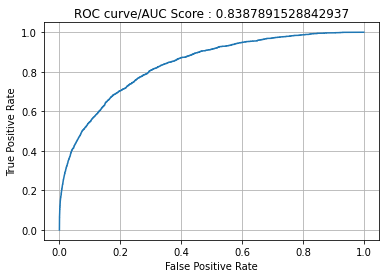

In [12]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(train_y,pred_train_2)
auc_score = roc_auc_score(train_y,pred_train_2)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)

In [10]:
len(pred_test_2)

18050

In [11]:
p = pd.DataFrame(pred_test_2)
p

,0
0,0.804121
1,0.064889
2,0.032542
3,0.003470
4,0.062356
...,...
18045,0.013428
18046,0.006510
18047,0.087581
18048,0.011804


In [12]:
test = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\test.csv')
id = test['id']
pred = pd.DataFrame(pred_test_2)
submit = pd.concat([id,pred], axis=1)
submit.columns = ['id', 'y']
submit

,id,y
0,0,0.804121
1,1,0.064889
2,2,0.032542
3,3,0.003470
4,4,0.062356
...,...,...
18045,18045,0.013428
18046,18046,0.006510
18047,18047,0.087581
18048,18048,0.011804


In [14]:
submit.to_csv('stack1.csv',index=False,header=False)